logo--portrait.svg

# **Generative AI Workshop** #
# **Block 1: Understanding Gen AI** #

Prof Dr Paul Geertsema (paul.geertsema@vlerick.com)

*Centre for Financial Leadership and Digital Transformation*



---

# **History** #

---

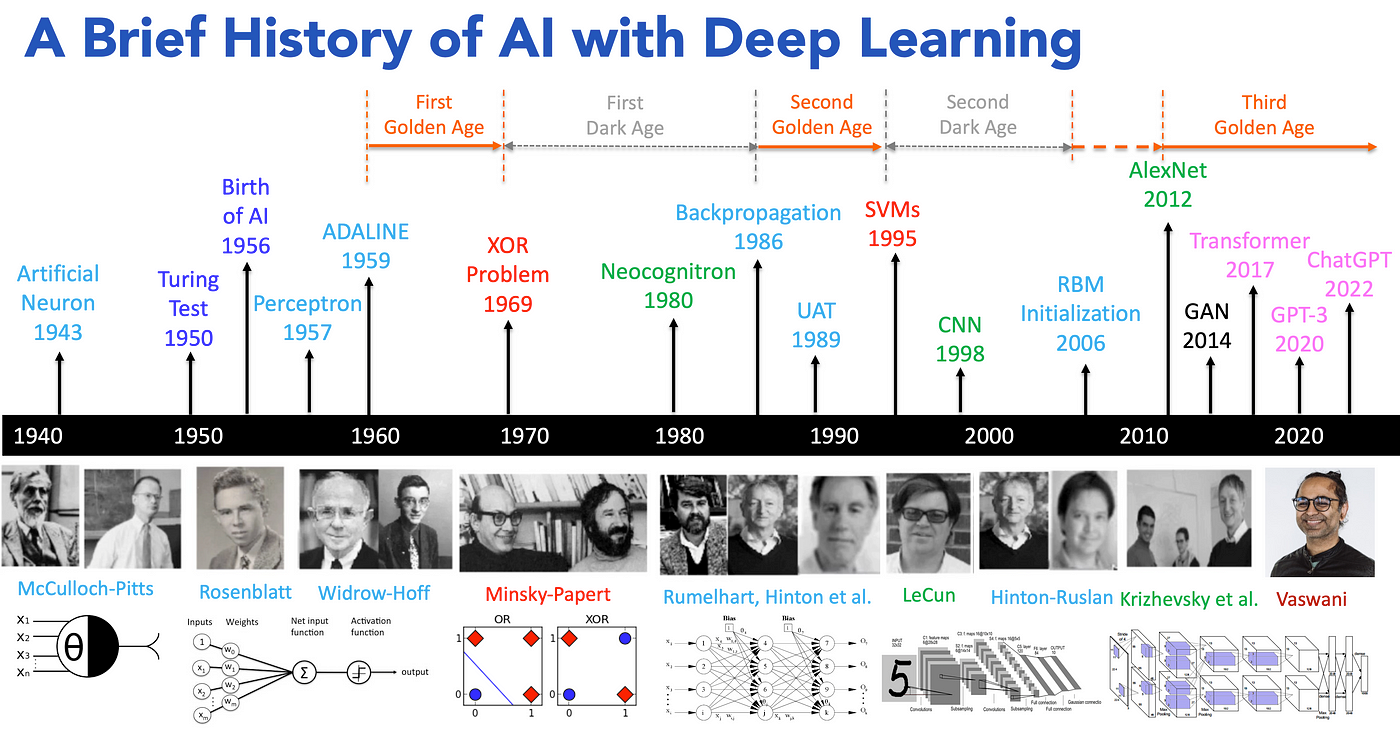


<sup><sup>  Source: https://medium.com/@lmpo/a-brief-history-of-ai-with-deep-learning-26f7948bc87b <sup><sup>


---

#**A bit of context**#

---


Ch1_venn_diagram (augmented).svg

<sup><sup> Source: "Machine Learning for Managers", Paul Geertsema.<sup><sup>


---

#**Neural Networks, circa 1991**#

---



**" *My CPU is a Neural Net Processor, a learning computer* "**:
Arnold Schwarzenegger as the T-800 in Terminator 2: Judgment Day


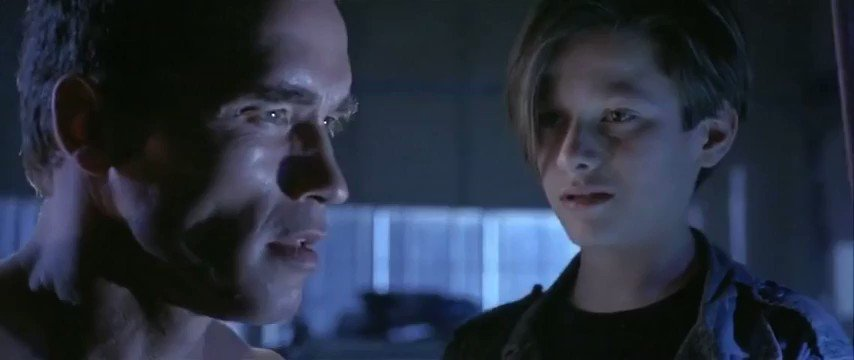


---

#**Neural Networks and Deep Learning**#

---




## A multi-layered neural network ##
Ch5 3-5-5-4-1.svg

<sup><sup> Source: "Machine Learning for Managers", Paul Geertsema.<sup><sup>


## Inside a node ##
Ch5_simple_model_detail.svg

<sup><sup> Source: "Machine Learning for Managers", Paul Geertsema.<sup><sup>

Let's try it: https://playground.tensorflow.org/

### *Real Data Example* ###
The "Bank Marketing" dataset, sourced from OpenML (ID 1461) contains information on a Portuguese banking institution's direct marketing campaigns, where the goal was to predict whether a client would subscribe to a term deposit based on various client and campaign features. The dataset includes attributes like age, job, marital status, and previous contact results, which can be crucial in understanding patterns and predicting customer behavior in response to financial products.

We will run a neural network in Python to predict customer subscription to a term deposit using scikit-learn's MLPClassifier, a neural network that predicts True/False outcomes.

### *Python Code* ###

In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

data = fetch_openml(data_id=1461, as_frame=True)
df = data.frame
print("Records in the dataset: ", len(df))
print("Data extract: ")
print(df.head())

Records in the dataset:  45211
Data extract: 
   V1            V2       V3         V4  V5    V6   V7   V8       V9  V10  \
0  58    management  married   tertiary  no  2143  yes   no  unknown    5   
1  44    technician   single  secondary  no    29  yes   no  unknown    5   
2  33  entrepreneur  married  secondary  no     2  yes  yes  unknown    5   
3  47   blue-collar  married    unknown  no  1506  yes   no  unknown    5   
4  33       unknown   single    unknown  no     1   no   no  unknown    5   

   V11  V12  V13  V14  V15      V16 Class  
0  may  261    1   -1    0  unknown     1  
1  may  151    1   -1    0  unknown     1  
2  may   76    1   -1    0  unknown     1  
3  may   92    1   -1    0  unknown     1  
4  may  198    1   -1    0  unknown     1  


In [19]:
# Features (X) and target (y)
X = df.drop('Class', axis=1).apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(df['Class'])

# Split into training and test data, then scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Specify and fit a neural network classifier
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, random_state=42, verbose=True)
print("Training ...")
model.fit(X_train, y_train)

# Report prediction accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Out-of-sample accuracy: {accuracy*100}%", )


Training ...
Iteration 1, loss = 0.30627135
Iteration 2, loss = 0.25084022
Iteration 3, loss = 0.24169819
Iteration 4, loss = 0.23702800
Iteration 5, loss = 0.23412244
Iteration 6, loss = 0.23206182
Iteration 7, loss = 0.23078616
Iteration 8, loss = 0.22986856
Iteration 9, loss = 0.22880147
Iteration 10, loss = 0.22803331
Iteration 11, loss = 0.22736229
Iteration 12, loss = 0.22707183
Iteration 13, loss = 0.22631504
Iteration 14, loss = 0.22585693
Iteration 15, loss = 0.22536508
Iteration 16, loss = 0.22481253
Iteration 17, loss = 0.22459533
Iteration 18, loss = 0.22417022
Iteration 19, loss = 0.22385854
Iteration 20, loss = 0.22322447
Iteration 21, loss = 0.22303951
Iteration 22, loss = 0.22266940
Iteration 23, loss = 0.22232190
Iteration 24, loss = 0.22197821
Iteration 25, loss = 0.22157947
Iteration 26, loss = 0.22125575
Iteration 27, loss = 0.22091402
Iteration 28, loss = 0.22071877
Iteration 29, loss = 0.22049178
Iteration 30, loss = 0.22018952
Out-of-sample accuracy: 89.837443326

---

# **Tokens and embeddings** #

---

## Tokens ##
---

Tokenizers: https://platform.openai.com/tokenizer


## Word embeddings ##

---

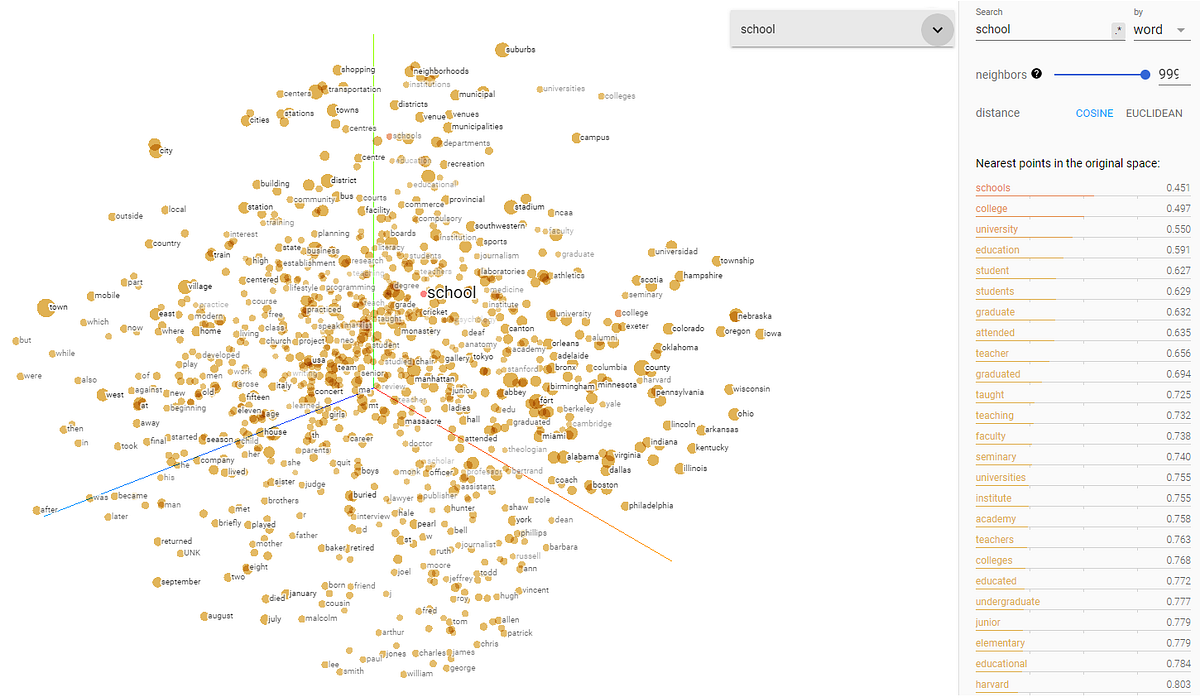


<sup><sup> Source: https://www.innerdoc.com/periodic-table-of-nlp-tasks/78-word-embedding-visualization/ <sup><sup>

Lets try it: https://projector.tensorflow.org/


---

#**Transformers and attention**#

---


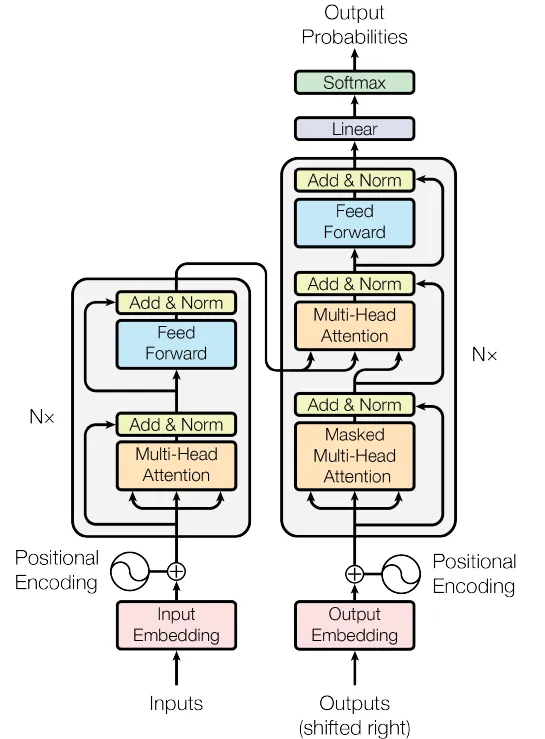

<sup><sup> Source: Ashish Vaswani, Noam Shazeer, Niki Parmar, et.al.(2017). **Attention is all you need**. NIPS 2017 (https://arxiv.org/abs/1706.03762) <sup><sup>

---

# **What do large language models do?** #

---

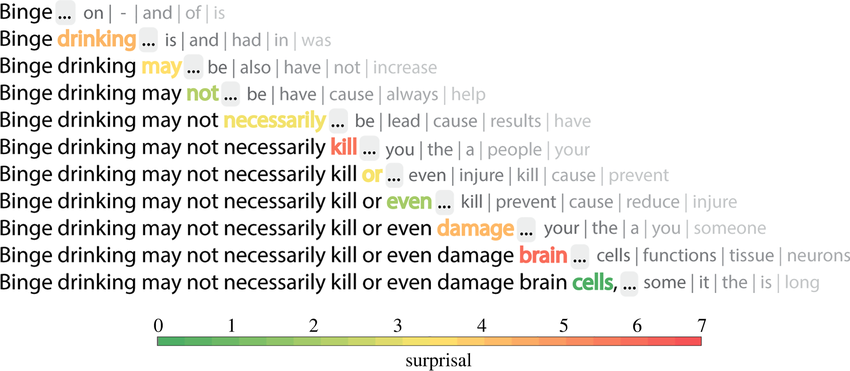

<sup><sup> Source: Cevoli, Watkins and Rastle (2022). **Prediction as a basis for skilled reading: insights from modern language models**. https://royalsocietypublishing.org/doi/10.1098/rsos.211837 <sup><sup>

---

# **The architecture of Large Language Models (LLMs)** #

---

Lets have a look: https://bbycroft.net/llm

### *Python Code* ###

In [20]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load the tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
model = GPT2LMHeadModel.from_pretrained("distilgpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [21]:
# Function to predict the next word
def predict_next_word(text, num_suggestions=1):
    # Tokenize input and convert to tensor
    input_ids = tokenizer.encode(text, return_tensors="pt")

    # Generate predictions (only the next token)
    with torch.no_grad():
        outputs = model(input_ids)

    # Get the logits of the last token and apply softmax
    next_token_logits = outputs.logits[:, -1, :]
    probabilities = torch.softmax(next_token_logits, dim=-1)

    # Get the top suggestions
    top_tokens = torch.topk(probabilities, num_suggestions, dim=-1).indices[0].tolist()
    suggestions = [tokenizer.decode([token]) for token in top_tokens]

    return suggestions

In [22]:
# Example usage
text = "This is not"
next_word_predictions = predict_next_word(text, num_suggestions=10)

print("Input Text:", text)
print("Next Word Predictions:", next_word_predictions)


Input Text: This is not
Next Word Predictions: [' a', ' the', ' an', ' to', ' possible', ' just', ' going', ' for', ' true', ' intended']


---

# **Classical ML/AI vs Gen AI** #

---

| **Aspect**            | **Classical ML/AI**                             | **Generative AI**                    |
|-----------------------|-------------------------------------------------|--------------------------------------|
| **Goal**              | Predict outcomes, classify data                 | Generate new content                 |
| **Data**              | Requires labeled data                           | Uses large, diverse datasets         |
| **Techniques**        | Supervised/unsupervised learning                | Transformers, LLM's, Diffusion models                    |
| **Output**            | Predictions, classifications                    | Synthetic data (text, images, audio) |
| **Applications**      | Fraud detection, recommendations                | Art, content creation, simulations   |
| **Interpretability**  | Often interpretable                             | Generally less interpretable         |
| **Complexity**        | Faster training, less compute-intensive         | High compute, longer training        |


---

# **Hands-on: Automated Expense Claim Review with the GPT API**#

---








## Code ##

### Step 1: Create test data ###

In [23]:
!pip install faker

In [24]:
import json
from faker import Faker
from random import randint, choice, seed, shuffle
from datetime import datetime, timedelta

fake = Faker()
Faker.seed(42)
seed(42)

departments = ["Research & Development", "Quality Assurance", "Operations", "Maintenance", "Sales", "Logistics"]
job_descriptions = ["Engineer", "Technician", "Supervisor", "Manager", "Sales Representative", "Logistics Coordinator"]
expense_descriptions = ["Business Lunch", "Travel Expense", "Equipment Purchase", "Raw Materials", "Training Program", "Safety Equipment"]
locations = ["Houston", "Dallas", "Chicago", "New York", "San Francisco", "Los Angeles"]

# Generate 20 synthetic expense claims
expense_claims = []
for _ in range(20):
    name = fake.name()
    job_description = choice(job_descriptions)
    department = choice(departments)
    date_of_expense = fake.date_this_year().strftime('%Y-%m-%d')
    location_of_expense = choice(locations)
    expense_description = choice(expense_descriptions)
    service_provider = fake.company()
    amount_of_claim = round(randint(50, 500) * 1.05, 2)  # Random amount with a slight variability

    claim = {
        "name": name,
        "job_description": job_description,
        "department": department,
        "date_of_expense": date_of_expense,
        "location_of_expense": location_of_expense,
        "expense_description": expense_description,
        "service_provider": service_provider,
        "amount_of_claim": amount_of_claim
    }
    expense_claims.append(claim)

expense_claims


[{'name': 'Allison Hill',
  'job_description': 'Logistics Coordinator',
  'department': 'Research & Development',
  'date_of_expense': '2024-03-11',
  'location_of_expense': 'Houston',
  'expense_description': 'Safety Equipment',
  'service_provider': 'Garcia, Yang and Gardner',
  'amount_of_claim': 199.5},
 {'name': 'Amanda Davis',
  'job_description': 'Technician',
  'department': 'Quality Assurance',
  'date_of_expense': '2024-03-14',
  'location_of_expense': 'Dallas',
  'expense_description': 'Safety Equipment',
  'service_provider': 'Johnson, Gonzalez and Santos',
  'amount_of_claim': 107.1},
 {'name': 'Connie Lawrence',
  'job_description': 'Logistics Coordinator',
  'department': 'Logistics',
  'date_of_expense': '2024-09-11',
  'location_of_expense': 'San Francisco',
  'expense_description': 'Business Lunch',
  'service_provider': 'Blake and Sons',
  'amount_of_claim': 369.6},
 {'name': 'Gina Moore',
  'job_description': 'Manager',
  'department': 'Research & Development',
  'd

### Step 2: Add a few high-risk claims ###

In [25]:
# now add a few high risk claims

# same person and time, different location, questionable expense
expense_claims.append(
{'name': 'Kevin Hurst',
  'job_description': 'Sales Representative',
  'department': 'Operations',
  'date_of_expense': '2024-05-01',
  'location_of_expense': 'Hong Kong',
  'expense_description': 'Entertainment',
  'service_provider': 'Happy Relax Spa',
  'amount_of_claim': 3946.23})

# very large amount
expense_claims.append(
 {'name': 'Jessica Johnson',
  'job_description': 'Supervisor',
  'department': 'Quality Assurance',
  'date_of_expense': '2024-02-09',
  'location_of_expense': 'Dallas',
  'expense_description': 'Gold purchase',
  'service_provider': 'Contintal Gold Dealers',
  'amount_of_claim': 70071.00})

# Expense from 5 years ago
expense_claims.append(
{'name': 'Anna Reeves',
  'job_description': 'Technician',
  'department': 'Logistics',
  'date_of_expense': '2009-05-23',
  'location_of_expense': 'Los Angeles',
  'expense_description': 'Safety Equipment',
  'service_provider': 'Patterson, Ellis and Thompson',
  'amount_of_claim': 231.30})

# Negative expense
expense_claims.append(
{'name': 'Mark Andersen',
  'job_description': 'Technician',
  'department': 'Sales',
  'date_of_expense': '2024-10-18',
  'location_of_expense': 'San Francisco',
  'expense_description': 'Business Lunch',
  'service_provider': 'BBQ and more',
  'amount_of_claim': -158.95})

shuffle(expense_claims)

### Step 3: Process via OpenAI API ###

In [32]:
ds = input()
#print(ds)
K = ds


xxx


In [31]:
mn = [5, 7, 72, 2, 27, 12, 1, 79, 30, 71, 44, 39, 72, 94, 21, 75, 57, 61, 23, 92, 27, 21, 39, 23, 49, 15, 22, 35, 91, 67, 70, 1, 92, 4, 34, 6, 11, 52, 37, 60, 66, 35, 25, 21, 92, 74, 37, 46, 45, 15, 69, 57, 25, 49, 36, 18, 28, 60, 36, 62, 46, 5, 43, 38, 5, 28, 45, 12, 40, 3, 3, 28, 16, 31, 93, 80, 25, 1, 38, 8, 47, 44, 59, 95, 52, 0, 7, 25, 47, 41, 7, 82, 71, 17, 6, 41, 19, 38, 48, 22, 55, 26, 10, 7, 59, 28, 40, 15, 25, 27, 25, 52, 48, 19, 64, 60, 47, 49, 32, 59, 18, 20, 42, 35, 1, 94, 62, 25, 7, 48, 28, 78, 9, 26, 5, 17, 2, 32, 86, 54, 9, 53, 37, 62, 27, 38, 20, 15, 60, 31, 45, 88, 15, 57, 49, 44, 57, 57, 7, 51, 2, 67, 0, 34]

def x(t, k):
    rk = (k * (len(t) // len(k) + 1))[:len(t)]
    if isinstance(t, str):
        en = [ord(c) ^ ord(k) for c, k in zip(t, rk)]
        return en
    elif isinstance(t, list):
        dc = [chr(num ^ ord(k)) for num, k in zip(t, rk)]
        return ''.join(dc)
    else:
        raise ValueError("Input must be a string or a list of numbers.")

dt = x(mn, K)
#print("dt:", dt)


In [28]:
from openai import OpenAI
import json

# Create OpenAI client
client = OpenAI(api_key=dt)

# After the presentation, if you want to use this code, you'll have to bring your own key
# see https://platform.openai.com/docs/quickstart

# Create a single prompt with all expense claims for ChatGPT review
def generate_review_prompt(expense_claims):
    claims_text = ""
    for i, claim in enumerate(expense_claims, start=1):
        claims_text += f"""
        Claim {i}:
        - Name: {claim['name']}
        - Job Description: {claim['job_description']}
        - Department: {claim['department']}
        - Date of Expense: {claim['date_of_expense']}
        - Location of Expense: {claim['location_of_expense']}
        - Expense Description: {claim['expense_description']}
        - Service Provider: {claim['service_provider']}
        - Amount of Claim: ${claim['amount_of_claim']}
        """

    prompt = f"""
    Review the following list of expense claims for high-risk flags. Assign a risk score from 1 to 10 (where 10 is the highest risk) for each claim based on potential inconsistencies or high-risk factors (e.g., unusual claim amounts, frequent claims, or discrepancies in locations and dates, claim dates in the future or distant past, or anything else that appears to be unusual or suspicious).

    For each claim return the full claim details along with the risk score and a reason for the high-risk assessment.

    {claims_text}
    """

    return prompt

# Function to review all expense claims in a single API call
def review_expense_claims(expense_claims):
    prompt = generate_review_prompt(expense_claims)

    # Make the OpenAI API call
    response = client.chat.completions.create(
        messages=[{"role": "system", "content": "You are a financial auditor specialized in reviewing expense claims for inconsistencies and risk."},
                  {"role": "user", "content": prompt}],
        model="gpt-4",
        max_tokens=len(prompt.split())*2,
        temperature=0.2
    )

    # Capture the review response
    review = response.choices[0].message
    return review

# Run the review and print only high-risk claims
review_summary = review_expense_claims(expense_claims)


### Step 4: Print claims sorted by risk ###

In [29]:
import re
import pandas as pd

# Parse review_summary to extract claim details, risk scores, and reasons
high_risk_claims = []

# Regular expression to capture claim number, risk score, and reason
claim_pattern = re.compile(r"Claim (\d+):.*?Risk Score: (\d+).*?Reason: (.*?)(?=Claim|$)", re.DOTALL)

matches = claim_pattern.findall(review_summary.content)
for match in matches:
    claim_number = int(match[0])
    risk_score = int(match[1])
    reason = match[2].strip()

    # Add parsed data to a list
    high_risk_claims.append({
        "claim_number": claim_number,
        "risk_score": risk_score,
        "reason": reason
    })

# Convert original claims and high-risk claims into dataframes
claims_df = pd.DataFrame(expense_claims)
high_risk_df = pd.DataFrame(high_risk_claims)

# Merge the dataframes on claim number
claims_df['claim_number'] = claims_df.index + 1
merged_claims = pd.merge(claims_df, high_risk_df, on="claim_number", how="inner")

# Sort merged claims by risk score in descending order
sorted_claims = merged_claims.sort_values(by="risk_score", ascending=False)

# Print the sorted claims
print(sorted_claims.to_string(index=False))

            name       job_description             department date_of_expense location_of_expense expense_description              service_provider  amount_of_claim  claim_number  risk_score                                                                                                                                                                                                        reason
   Mark Andersen            Technician                  Sales      2024-10-18       San Francisco      Business Lunch                  BBQ and more          -158.95            15          10                                                                                              The amount of the claim is negative, which is highly unusual and could indicate an error or fraudulent activity.
 Jessica Johnson            Supervisor      Quality Assurance      2024-02-09              Dallas       Gold purchase        Contintal Gold Dealers         70071.00            16          10                

In [30]:
review_summary.content.split("\n")

['Claim 1:',
 '- Risk Score: 1',
 '- Reason: No apparent inconsistencies or high-risk factors.',
 '',
 'Claim 2:',
 '- Risk Score: 2',
 "- Reason: The claimant's job description and department do not align. A logistics coordinator working in the research & development department is unusual.",
 '',
 'Claim 3:',
 '- Risk Score: 2',
 "- Reason: Similar to Claim 2, the claimant's job description and department do not align.",
 '',
 'Claim 4:',
 '- Risk Score: 1',
 '- Reason: No apparent inconsistencies or high-risk factors.',
 '',
 'Claim 5:',
 '- Risk Score: 1',
 '- Reason: No apparent inconsistencies or high-risk factors.',
 '',
 'Claim 6:',
 '- Risk Score: 1',
 '- Reason: No apparent inconsistencies or high-risk factors.',
 '',
 'Claim 7:',
 '- Risk Score: 8',
 '- Reason: The date of the claim is significantly in the past, which is unusual and could indicate an error or fraudulent activity.',
 '',
 'Claim 8:',
 '- Risk Score: 1',
 '- Reason: No apparent inconsistencies or high-risk fact

---

# **Coding in 2024** #

---


"I am going to use an LLM to review expense claims. First I need some synthetic data to use for testing, using Python. I would like you to generate 20 expense claims for a hypothetical manufacturer.  Include name, job description, department, date of expense, location of expense, expense description, name of service / goods provider and amount of claim. Next, use the Open AI API with a suitable prompt to identify and list high risk claims, along with a reason for the risk assessment. Finally, print the full claim details, in decreasing order by claim risk."